<a href="https://colab.research.google.com/github/phionex2/Deep-Learning/blob/new_main/visualizing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467096/553467096 [==============================] - 5s 0us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters,biases = model.layers[i].get_weights()
  print("layers number",i,model.layers[i].name,filters.shape)

layers number 1 block1_conv1 (3, 3, 3, 64)
layers number 2 block1_conv2 (3, 3, 64, 64)
layers number 4 block2_conv1 (3, 3, 64, 128)
layers number 5 block2_conv2 (3, 3, 128, 128)
layers number 7 block3_conv1 (3, 3, 128, 256)
layers number 8 block3_conv2 (3, 3, 256, 256)
layers number 9 block3_conv3 (3, 3, 256, 256)
layers number 11 block4_conv1 (3, 3, 256, 512)
layers number 12 block4_conv2 (3, 3, 512, 512)
layers number 13 block4_conv3 (3, 3, 512, 512)
layers number 15 block5_conv1 (3, 3, 512, 512)
layers number 16 block5_conv2 (3, 3, 512, 512)
layers number 17 block5_conv3 (3, 3, 512, 512)


In [4]:
filters,bias=model.layers[1].get_weights()

In [5]:
f_min,f_max=filters.min(),filters.max()
filters = (filters - f_min) / (f_max - f_min)

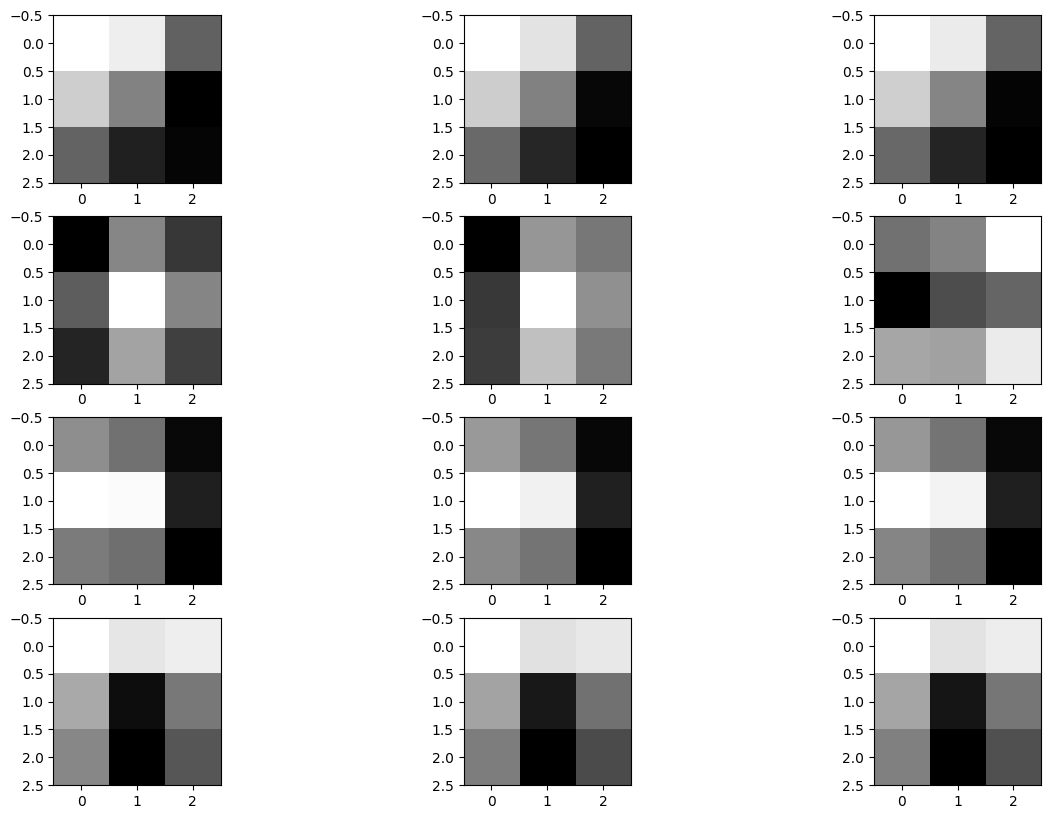

In [8]:
import matplotlib.pyplot as pyplot
n_filters = 4
ix = 1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3):
    pyplot.subplot(n_filters,3,ix)
    pyplot.imshow(f[:,:,j],cmap='gray')
    ix+=1
pyplot.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model

model = Model(input=model.inputs , outputs=model.layers[1].output)

TypeError: ('Keyword argument not understood:', 'input')